<a href="https://colab.research.google.com/github/rachit-shah/automated-learning-and-data-analysis/blob/master/hw3q6%20(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 6. (15 points) [SVM Programming][Xi Yang]
### In this question, you will employ SVM to solve a classification problem for the provided data file “hw3q6.csv”. Each row in the data file indicates a sample. The first 12 columns are features and the last column “Class” indicates the label, with 1 and 0 indicating the positive and negative samples, respectively.
###Write code in Matlab, R or Python to perform the following tasks. Please report your outputs and key codes in the document file and also include your code (end with .m, .r or .py) in the .zip file.

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### (a) (1 point) Load data. Report the size of positive and negative samples in dataset.


In [0]:
df = pd.read_csv("hw3q6.csv")
y = df.Class
X = df.drop(["Class"],axis=1)
numPos = sum(y==1)
numNeg = sum(y==0)
print("Number of Positive Samples (Class=1) =",numPos)
print("Number of Negative Samples (Class=0) =",numNeg)


Number of Positive Samples (Class=1) = 90
Number of Negative Samples (Class=0) = 110


#### (b) (4 points) Use stratified random sampling to divide the dataset into training data (75%) and testing data (25%). Report the number of positive and negative samples in both training and testing data.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=7)

In [0]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#### (c) (4 points) Take SVM with linear kernel as classifier (third-party packages are allowed to use) and set the regularization parameter C as: [0.1, 0.5, 1, 5, 10, 50, 100], respectively. For each value of C, train a SVM classifier with the training data and get the number of support vectors (SVs). Generate a plot with C as the horizontal axis and number of SVs as the vertical axis. Give a brief analysis for the plot.

In [0]:
C = [0.1, 0.5, 1, 5, 10, 50, 100]
nSV = []
for c in C:
  model = SVC(kernel='linear',C=c)
  model.fit(X_train,y_train)
  nSV.append(len(model.support_vectors_))


Text(0.5,1,'Regularization Parameter vs No. of SVs')

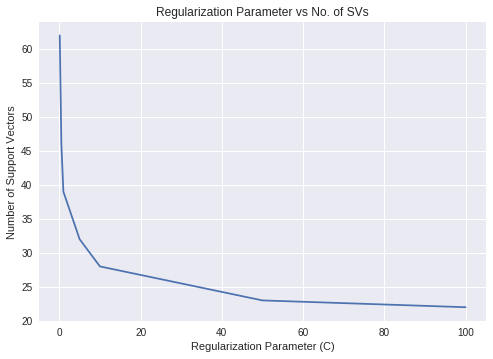

In [0]:
plt.plot(C,nSV)
plt.ylabel('Number of Support Vectors')
plt.xlabel('Regularization Parameter (C)')
plt.title('Regularization Parameter vs No. of SVs')

#Analysis of the plot
## The regularization parameter (C) is the penalty enforced in the Langrange multiplier such that the number of misclassifications are reduced. Accordingly, larger the C, SVM would try to minimize the margin such that misclassifications do not occur. Conversely, lower the C, the margin fitted by SVM would be more wider even if it misclassifies some points. 

## As can be seen in the above plot, lower the C, higher the number of support vectors and higher the C, lower the number of support vectors. Hence, they are inversely proportional to each other. For higher C, the margin would be narrower and hence, number of SVs would be lower. In contrast, for lower C, the margin would be wider and hence more number of support vectors.

#### (d) (6 points) Compare 4 different kernel functions, including linear, polynomial, radial basic function (Gaussian kernel), and sigmoid kernel. Make a table to record the accuracy, precision, recall and f-measure of the classification results for the 4 kernel functions. Try to tune the parameters via grid search and report your best results with the optimal parameters. Based on the results, which kernel function will you choose?

In [0]:
kernels = ['linear','poly','rbf','sigmoid']
accuracy = []
precisions =[]
recalls = []
f_measures =[]
best_params = []

##### Linear Kernel

In [0]:
param_grid = [
  {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 1000], 'tol': [0.0001,0.001,0.01,0.1], 'kernel': ['linear']},
]
grid = GridSearchCV(SVC(random_state=7),param_grid,refit = True)
grid.fit(X_train,y_train)
bestpar = grid.best_params_
best_params.append(bestpar)
print('Best Parameters:',bestpar)
predicted_class = grid.predict(X_test)
precision,recall,fscore,support=score(y_test,predicted_class,average='macro')
conf_mat = confusion_matrix(y_test, predicted_class)
print(conf_mat)
acc = str((conf_mat[0][0]+conf_mat[1][1])/(sum(sum(conf_mat))))
print('Precision : ',precision)
print('Recall    : ',recall)
print('F-score   : ',fscore)
print("Accuracy  : ",acc)
accuracy.append(acc)
precisions.append(precision)
recalls.append(recall)
f_measures.append(fscore)



Best Parameters: {'C': 50, 'kernel': 'linear', 'tol': 0.0001}
[[24  3]
 [ 2 21]]
Precision :  0.8990384615384616
Recall    :  0.9009661835748792
F-score   :  0.8996386993175431
Accuracy  :  0.9


##### Polynomial Kernel

In [0]:
param_grid = [
  {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 1000], 'gamma': [0.001, 0.0001], 'coef0': [0,0.001,0.01,0.1], 'tol': [0.0001,0.001,0.01,0.1], 'degree':[0,1,2,3,4,5,6], 'kernel': ['poly']}
]
grid = GridSearchCV(SVC(random_state=7),param_grid,refit = True)
grid.fit(X_train,y_train)
bestpar = grid.best_params_
best_params.append(bestpar)
print('Best Parameters:',bestpar)
predicted_class = grid.predict(X_test)
precision,recall,fscore,support=score(y_test,predicted_class,average='macro')
conf_mat = confusion_matrix(y_test, predicted_class)
print(conf_mat)
acc = str((conf_mat[0][0]+conf_mat[1][1])/(sum(sum(conf_mat))))
print('Precision : ',precision)
print('Recall    : ',recall)
print('F-score   : ',fscore)
print("Accuracy  : ",acc)
accuracy.append(acc)
precisions.append(precision)
recalls.append(recall)
f_measures.append(fscore)

Best Parameters: {'C': 1000, 'coef0': 0.001, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly', 'tol': 0.0001}
[[24  3]
 [ 0 23]]
Precision :  0.9423076923076923
Recall    :  0.9444444444444444
F-score   :  0.9399759903961584
Accuracy  :  0.94


##### rbf kernel

In [0]:
param_grid = [
  {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 1000], 'gamma': [0.001, 0.0001], 'tol': [0.0001,0.001,0.01,0.1],'kernel': ['rbf'] }
]
grid = GridSearchCV(SVC(random_state=7),param_grid,refit = True)
grid.fit(X_train,y_train)
bestpar = grid.best_params_
best_params.append(bestpar)
print('Best Parameters:',bestpar)
predicted_class = grid.predict(X_test)
precision,recall,fscore,support=score(y_test,predicted_class,average='macro')
conf_mat = confusion_matrix(y_test, predicted_class)
print(conf_mat)
acc = str((conf_mat[0][0]+conf_mat[1][1])/(sum(sum(conf_mat))))
print('Precision : ',precision)
print('Recall    : ',recall)
print('F-score   : ',fscore)
print("Accuracy  : ",acc)
accuracy.append(acc)
precisions.append(precision)
recalls.append(recall)
f_measures.append(fscore)

Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf', 'tol': 0.0001}
[[26  1]
 [ 0 23]]
Precision :  0.9791666666666667
Recall    :  0.9814814814814814
F-score   :  0.9799277398635087
Accuracy  :  0.98


##### sigmoid kernel

In [0]:
param_grid = [
  {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 1000], 'gamma': [0.001, 0.0001], 'coef0': [0,0.001,0.01,0.1], 'tol': [0.0001,0.001,0.01,0.1],'kernel': ['sigmoid']}
]
grid = GridSearchCV(SVC(random_state=7),param_grid,refit = True)
grid.fit(X_train,y_train)
bestpar = grid.best_params_
best_params.append(bestpar)
print('Best Parameters:',bestpar)
predicted_class = grid.predict(X_test)
precision,recall,fscore,support=score(y_test,predicted_class,average='macro')
conf_mat = confusion_matrix(y_test, predicted_class)
print(conf_mat)
acc = str((conf_mat[0][0]+conf_mat[1][1])/(sum(sum(conf_mat))))
print('Precision : ',precision)
print('Recall    : ',recall)
print('F-score   : ',fscore)
print("Accuracy  : ",acc)
accuracy.append(acc)
precisions.append(precision)
recalls.append(recall)
f_measures.append(fscore)

Best Parameters: {'C': 50, 'coef0': 0, 'gamma': 0.001, 'kernel': 'sigmoid', 'tol': 0.0001}
[[24  3]
 [ 1 22]]
Precision :  0.9199999999999999
Recall    :  0.9227053140096618
F-score   :  0.9198717948717948
Accuracy  :  0.92


In [0]:
res_tab = pd.DataFrame({'Kernel':kernels,'Accuracy':accuracy,'Precision':precisions,'Recall':recalls,'F-Score':f_measures,'BestParams':best_params},columns=['Kernel','Accuracy','Precision','Recall','F-Score','BestParams'])

In [0]:
pd.set_option('display.max_colwidth', 1000)
res_tab

,Kernel,Accuracy,Precision,Recall,F-Score,BestParams
0,linear,0.9,0.899038,0.900966,0.899639,"{'C': 50, 'kernel': 'linear', 'tol': 0.0001}"
1,poly,0.94,0.942308,0.944444,0.939976,"{'C': 1000, 'coef0': 0.001, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly', 'tol': 0.0001}"
2,rbf,0.98,0.979167,0.981481,0.979928,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf', 'tol': 0.0001}"
3,sigmoid,0.92,0.920000,0.922705,0.919872,"{'C': 50, 'coef0': 0, 'gamma': 0.001, 'kernel': 'sigmoid', 'tol': 0.0001}"


# Looking at the above table, we would choose rbf kernel since it provides the best precision, recall, f-score and accuracy.